Task 1: Generate an Image
Create a 3D array. The size of array is 100x100 and at value of (R,G,B) e.g (255,0,0) is stored at each pixel. So the dimensions of the image are 100x100x3. Now display the image using matplotlib. imshow() function


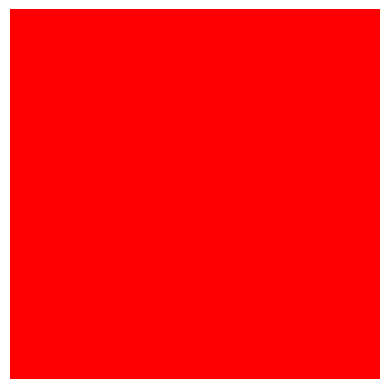

In [31]:
import numpy as np
import matplotlib.pyplot as plt

image_array = np.full((100, 100, 3), [255, 0, 0], dtype=np.uint8)

plt.imshow(image_array)
plt.axis('off') # Hide axes
plt.show()

Task 2: A set of images is attached (soil type.zip). Images contains different soil types. Folder name describes the soil type and all the images within are belongs to that type. All you have to do is to load images into numpy array.

In [33]:
import zipfile
import os

zip_file_path = "/content/soil types.zip"
extraction_dir = "/content/soil_images"

os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)


Step 1: Create a pandas dataframe such as:
Sr#	Image Path	Type
1	3.jpg	Yellow
2	4.jpg	Peat

This data frame will categorize the images into their types.



In [34]:
import pandas as pd
import os

data = []

for root, _, files in os.walk(extraction_dir):
    soil_type = os.path.basename(root)
    for file in files:
        image_path = os.path.join(root, file)
        data.append({'Image Path': image_path, 'Type': soil_type})

df = pd.DataFrame(data)

display(df.head())

Image Path        Type
0  /content/soil_images/Soil types/Black Soil/27.jpg  Black Soil
1  /content/soil_images/Soil types/Black Soil/11.jpg  Black Soil
2  /content/soil_images/Soil types/Black Soil/12.jpg  Black Soil
3  /content/soil_images/Soil types/Black Soil/24.jpg  Black Soil
4  /content/soil_images/Soil types/Black Soil/28.jpg  Black Soil

Step 2: Now read the images from those paths and convert them into Numpy arrays. Your program should display the number of images contains in each type  of soil and their sizes individually. Use Numpy.Shape function to show the size of each image.

In [35]:
from PIL import Image
import numpy as np

images_by_type = {}

for index, row in df.iterrows():
    image_path = row['Image Path']
    soil_type = row['Type']

    try:
        img = Image.open(image_path)
        img_array = np.array(img)

        if soil_type not in images_by_type:
            images_by_type[soil_type] = []
        images_by_type[soil_type].append(img_array)

    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

for soil_type, images in images_by_type.items():
    print(f"Soil Type: {soil_type}")
    print(f"Number of images: {len(images)}")
    for i, img_array in enumerate(images):
        print(f"  Image {i+1} size: {img_array.shape}")
    print("-" * 20)

Soil Type: Black Soil
Number of images: 37
  Image 1 size: (168, 300, 3)
  Image 2 size: (184, 274, 3)
  Image 3 size: (183, 275, 3)
  Image 4 size: (225, 225, 3)
  Image 5 size: (223, 226, 3)
  Image 6 size: (194, 259, 3)
  Image 7 size: (185, 240, 3)
  Image 8 size: (335, 500, 3)
  Image 9 size: (172, 265, 3)
  Image 10 size: (168, 300, 3)
  Image 11 size: (172, 264, 3)
  Image 12 size: (183, 275, 3)
  Image 13 size: (225, 225, 3)
  Image 14 size: (183, 275, 3)
  Image 15 size: (183, 275, 3)
  Image 16 size: (188, 268, 3)
  Image 17 size: (183, 276, 3)
  Image 18 size: (183, 275, 3)
  Image 19 size: (168, 299, 3)
  Image 20 size: (210, 240, 3)
  Image 21 size: (183, 275, 3)
  Image 22 size: (183, 275, 3)
  Image 23 size: (194, 259, 3)
  Image 24 size: (184, 275, 3)
  Image 25 size: (183, 276, 3)
  Image 26 size: (183, 275, 3)
  Image 27 size: (243, 340, 3)
  Image 28 size: (183, 275, 3)
  Image 29 size: (184, 274, 3)
  Image 30 size: (275, 183, 3)
  Image 31 size: (183, 275, 3)
  Ima

Task 3
Build ANN for Soil Type Classification.
You have to do the following tasks:
a)	Load the data into numpy  arrays
b)	Split the data into training test samples
c)	Build ANN model using Tensorflow
d)	Run the model till 10 epochs
e)	Display final accuracy.
f)	Number of hidden layers should be last 2 digits of your student id / 10.


In [36]:
from PIL import Image

target_size = (128, 128)

preprocessed_data = []

for soil_type, images in images_by_type.items():
    for img_array in images:
        try:
            img = Image.fromarray(img_array)

            img_resized = img.resize(target_size, Image.BILINEAR)

            img_resized_array = np.array(img_resized)

            img_normalized = img_resized_array / 255.0

            preprocessed_data.append((img_normalized, soil_type))
        except Exception as e:
            print(f"Error processing image for soil type {soil_type}: {e}")

print(f"Number of preprocessed images: {len(preprocessed_data)}")

if preprocessed_data:
    print(f"Shape of the first preprocessed image: {preprocessed_data[0][0].shape}")

Number of preprocessed images: 156
Shape of the first preprocessed image: (128, 128, 3)


In [37]:
from sklearn.preprocessing import LabelEncoder

images = [item[0] for item in preprocessed_data]
labels = [item[1] for item in preprocessed_data]

label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

print("First 5 numerical labels:", numerical_labels[:5])
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

First 5 numerical labels: [0 0 0 0 0]
Label mapping: {np.str_('Black Soil'): np.int64(0), np.str_('Cinder Soil'): np.int64(1), np.str_('Laterite Soil'): np.int64(2), np.str_('Peat Soil'): np.int64(3), np.str_('Yellow Soil'): np.int64(4)}


In [38]:
from sklearn.model_selection import train_test_split

images = np.array(images)

X_train, X_test, y_train, y_test = train_test_split(images, numerical_labels, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (117, 128, 128, 3)
Shape of X_test: (39, 128, 128, 3)
Shape of y_train: (117,)
Shape of y_test: (39,)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

num_hidden_layers = 34

model = Sequential()

model.add(Flatten(input_shape=X_train.shape[1:]))

for _ in range(num_hidden_layers):
    model.add(Dense(128, activation='relu'))

num_classes = len(np.unique(numerical_labels))
model.add(Dense(num_classes, activation='softmax'))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,51

 Total params: 6,837,125 (26.08 MB)

 Trainable params: 6,837,125 (26.08 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Train the model
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.1660 - loss: 1.6097
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2801 - loss: 1.6083
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2593 - loss: 1.6077
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.2353 - loss: 1.6073
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2676 - loss: 1.6055
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1811 - loss: 1.6118
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2249 - loss: 1.6062
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.2384 - loss: 1.6015
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2468 - loss: 1.6035
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2280 - loss: 1.6049


In [42]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.6117
Test Accuracy: 0.2308
